# Section 1: Introduction

Lung cancer remains the leading cause of cancer-related mortality globally, accounting for numerous deaths each year. Despite advancements in medical technology, early detection of lung cancer, which significantly improves survival rates, is still primarily reliant on traditional methods such as X-rays, CT scans, and invasive biopsies. These methods, while effective, have limitations including cost, accessibility, and the need for specialized equipment and personnel.

This project is motivated by the need for alternative diagnostic approaches that are less invasive and more accessible. By leveraging a dataset titled "Lung Cancer Prediction" from Kaggle, this study aims to develop a predictive model that can determine the likelihood of a patient being diagnosed with lung cancer at three different risk levels: Low, Medium, and High. The dataset encompasses individuals monitored over an average span of six years, categorized into groups based on their exposure to high or low levels of air pollution. 

Our objective is to identify key risk factors such as air pollution, alcohol consumption, and smoking habits to explore their potential links to lung cancer. Through this analysis, we hope to contribute to the early detection and effective treatment of lung cancer, thereby increasing patient survival rates and reducing the burden on healthcare systems.


# Import all necessary libraries

In order to ensure the reproducibility of our Python environment and the consistency of our results, we have created a requirements.txt file. This file serves as a record of all Python packages and their versions that are necessary to run our project. By specifying these dependencies, we enable others to recreate our environment exactly as it was during our analysis.

In [1]:
# Uncomment and run the code below in this cell if your Python environment hasn't installed the necessary dependencies and libraries yet.
# !pip install -q -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
#import packages
import pandas as pd
import numpy as np
import os
import plotly
import plotly.express as plotly_express
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

# Exploratory Analysis 

This section of the report outlines our approach to exploring the "Lung Cancer Prediction" dataset. Our primary goal is to identify potential risk factors associated with lung cancer and to understand the data's characteristics which might influence the model's predictions.

## 1. Data Loading and Initial Inspection

In [3]:
# Load the dataset
curr_dir = os.getcwd()
f_path = os.path.join(curr_dir, 'data', 'cancer patient data sets.csv')
df = pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


The initial step involves loading the dataset using pandas to examine the structure and type of data, which is essential for understanding the dataset's characteristics. The initial inspection revealed several attributes such as age, gender, air pollution levels, alcohol use, and genetic risks, among others. This step is crucial as it sets the foundation for subsequent data handling and analysis.

## 2. Data Cleaning


In [4]:
df = df.drop('index', axis=1)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Data cleaning is a critical process to prepare the dataset for analysis. It involved removing irrelevant columns like 'index', which do not contribute to the analysis. Additionally, we checked for missing values across the dataset. The pandas function df.info() indicated no missing values, which simplifies the preprocessing steps. The cleaning process ensures that the dataset is neat and usable for accurate analysis.

### Unique Values and Descriptive Statistics

In [5]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values_per_column.items():
    if column != "Patient Id":
        print(f"Unique values for column '{column}': {values}")

Unique values for column 'Age': [33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
Unique values for column 'Gender': [1 2]
Unique values for column 'Air Pollution': [2 3 4 7 6 5 1 8]
Unique values for column 'Alcohol use': [4 1 5 7 8 3 6 2]
Unique values for column 'Dust Allergy': [5 6 7 4 2 8 1 3]
Unique values for column 'OccuPational Hazards': [4 3 5 7 2 6 8 1]
Unique values for column 'Genetic Risk': [3 4 5 6 7 2 1]
Unique values for column 'chronic Lung Disease': [2 4 7 6 3 5 1]
Unique values for column 'Balanced Diet': [2 6 7 4 5 3 1]
Unique values for column 'Obesity': [4 2 7 3 5 6 1]
Unique values for column 'Smoking': [3 2 7 8 1 6 5 4]
Unique values for column 'Passive Smoker': [2 4 3 7 6 8 5 1]
Unique values for column 'Chest Pain': [2 4 7 3 6 5 9 8 1]
Unique values for column 'Coughing of Blood': [4 3 8 9 1 5 7 6 2]
Unique values for column 'Fatigue': [3 1 8 4 5 9 2 6]
Unique values for column 'Weight L

By examining the unique values for each column, we gained insights into the range of variables like 'Age', 'Gender', and lifestyle-related factors ('Smoking', 'Alcohol use'). This step confirms the absence of any anomalous entries and helps understand the diversity within the dataset.

In [6]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


We removed columns that are not relevant to our analysis to simplify the dataset.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution Analysis

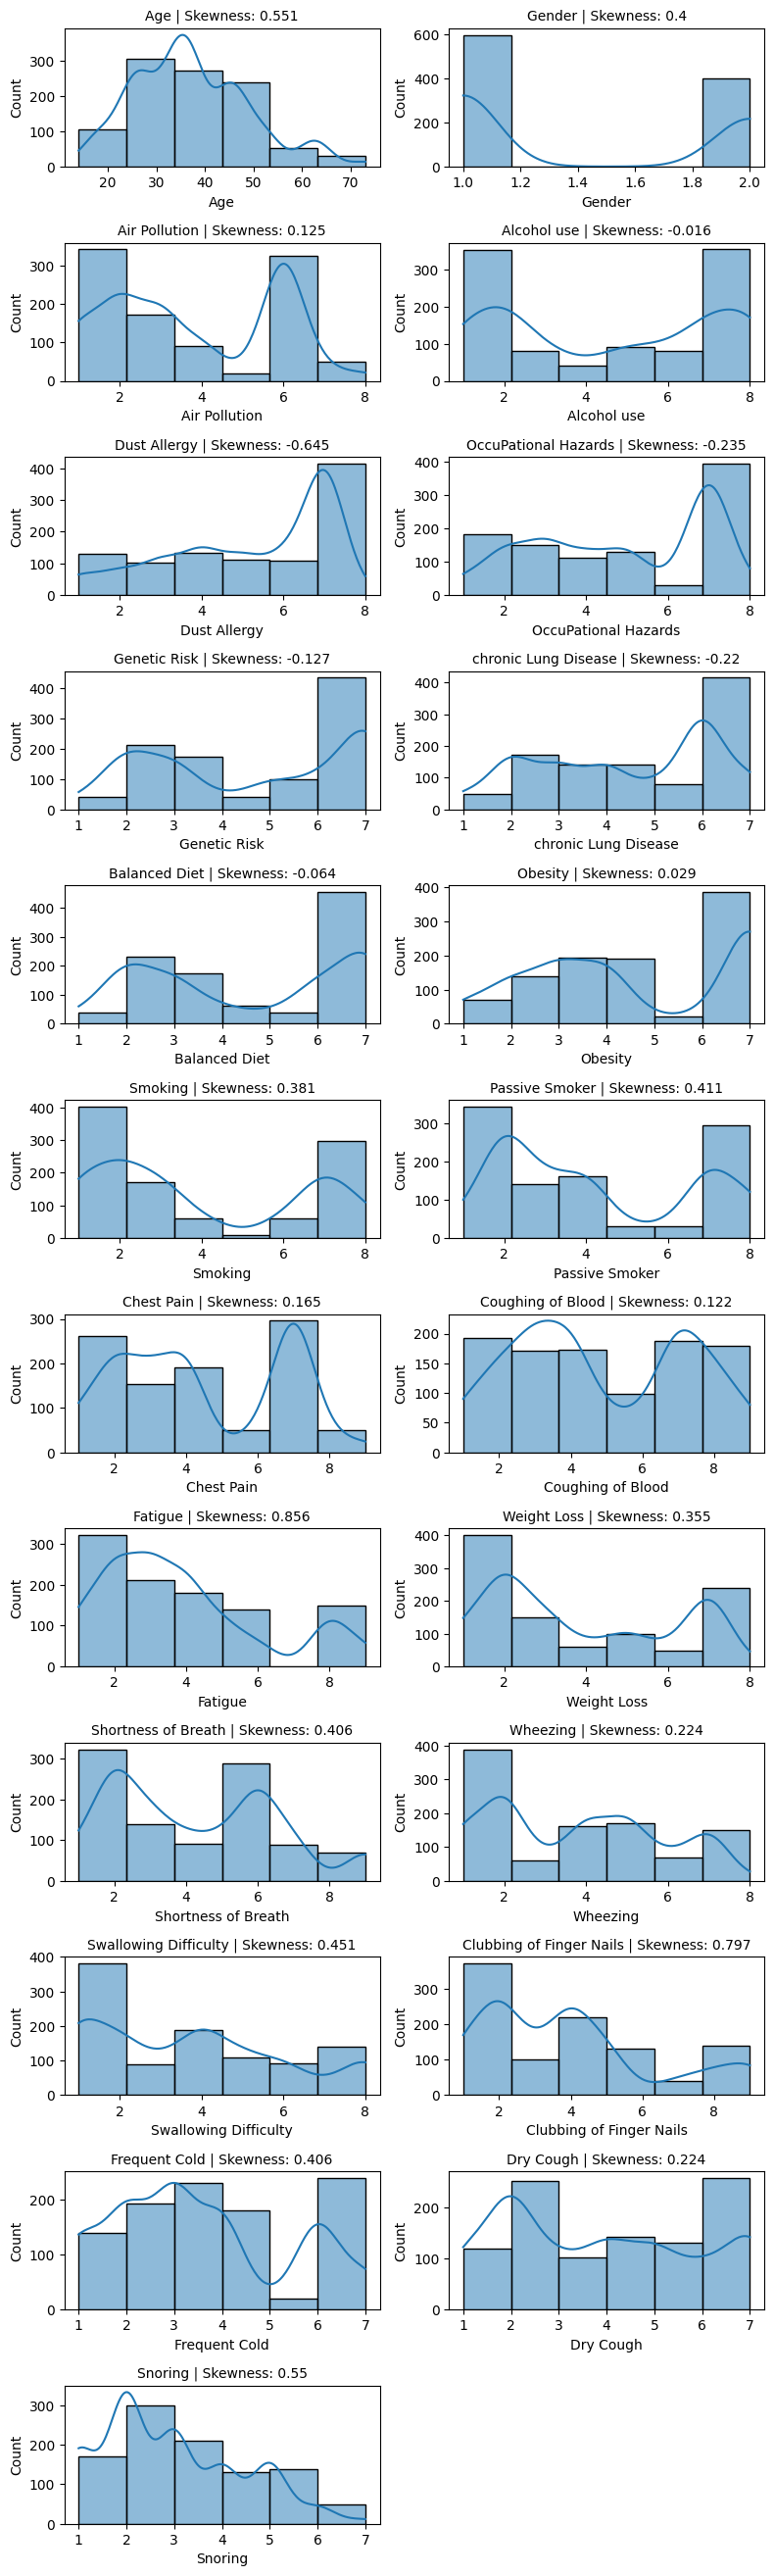

In [7]:
# Remove patient id and label
features = df.drop(["Patient Id","Level"], axis=1)
plt.figure(figsize=(8, 25*2))

# Look at the distribution for each feature and see if there is any feature with abs(skewness)>=1. If so, have to do some sort of transformation such as log transformation 
for index, feature in enumerate(features, 1):
    plt.subplot(23, 2, index)
    sns.histplot(df[feature], kde=True,bins=6)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 3)}",fontsize=10)
 
plt.tight_layout()
plt.show()

*Figure 1.*  _Distribution of skewness for all the different attributes. The x-axis represents the attributes, and the y-axis represents count._

The histogram and skewness analysis for each feature serve to illuminate the underlying structure of our data and to guide our preprocessing strategy (Figure 1). The analysis specifically helps in two primary ways:

1. **Identifying Data Distributions**: The histograms visually present the distribution of each variable. Understanding the shape and spread of the data is crucial for recognizing patterns, detecting outliers, and identifying features with significant variances. These insights are important when considering the assumptions of our future predictive models.

2. **Assessing Skewness**: Skewness quantifies the asymmetry of the data distribution. This measure is particularly relevant because many machine learning algorithms perform best with normally distributed data. Detecting skewness informs us whether a transformation may be necessary to achieve better modeling results.

From the analysis provided, we noticed that:

- **Age** has a moderate right skew, indicating a younger population within the dataset. This demographic tilt could affect how age-related factors are interpreted in risk prediction.
- **Dust Allergy** has a noticeable left skew, meaning there are more individuals in the dataset with high ratings of dust allergy. This could be an important predictor if the skew indicates a link between dust allergy and lung cancer risk.
- Most other variables, including **Air Pollution**, **Alcohol use**, and **Obesity**, exhibit skewness close to zero, suggesting a fairly symmetrical distribution. Their distributions do not show extreme skewness, and thus, they may not require data transformation before being used in our predictive models.

Notably, **Genetic Risk** and **Occupational Hazards** show only slight negative skewness, suggesting that while there are individuals at higher risk, the data does not lean excessively in this direction.

Overall, the analysis revealed that the dataset is relatively well-behaved with only a few features showing moderate skewness. Therefore, it is likely that most features can be used without transformation in the modeling phase, simplifying the data preparation process. However, it should be noted that during our baseline testing, features like Age and Dust Allergy were not normalized, as initial evaluations indicated that scaling these features was not necessary to achieve accurate risk predictions without biasing the model.

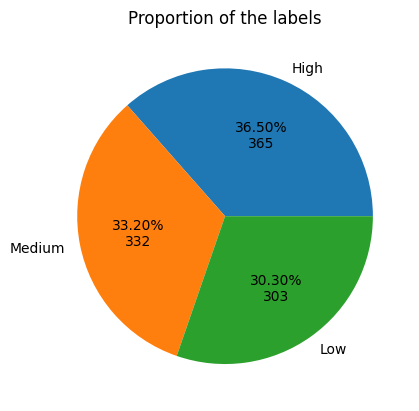

In [8]:
plt.figure() 
Level_lst=df['Level'].value_counts()
labels = Level_lst.index.tolist()
counts = Level_lst.values.tolist()
plt.pie(counts, labels=labels, autopct=lambda x: '{:.2f}%\n{:,.0f}'.format(x, x * sum(Level_lst /100)))
plt.title(f'Proportion of the labels')
plt.show()

*Figure 2.*  _Proportion of Labels by Category. This pie chart illustrates the distribution of labels across three categories: High, Medium, and Low._

In assessing the balance of our target variable, the 'Level' of lung cancer risk, the dataset exhibits a fairly even distribution across the three categories: Low, Medium, and High risk. Specifically, 30.30% of the cases are categorized as Low risk, 33.20% as Medium risk, and 36.50% as High risk (Figure 2). This relatively uniform distribution is advantageous for predictive modeling as it suggests that our dataset is not heavily skewed towards any single class, which could lead to model bias.

From a modeling perspective, this distribution means that we can proceed with standard machine learning algorithms without the immediate need for techniques that handle imbalanced data, such as resampling or specialized cost functions. However, the slight over-representation of High-risk cases may still warrant attention during model training and evaluation to ensure that predictions are not unduly biased towards this category.

Overall, the proportionate representation of each risk level in our dataset provides a solid foundation for building and evaluating a model that aims to predict the risk of lung cancer with balanced accuracy across all risk levels.

### 3.2 Correlation Analysis

<Axes: >

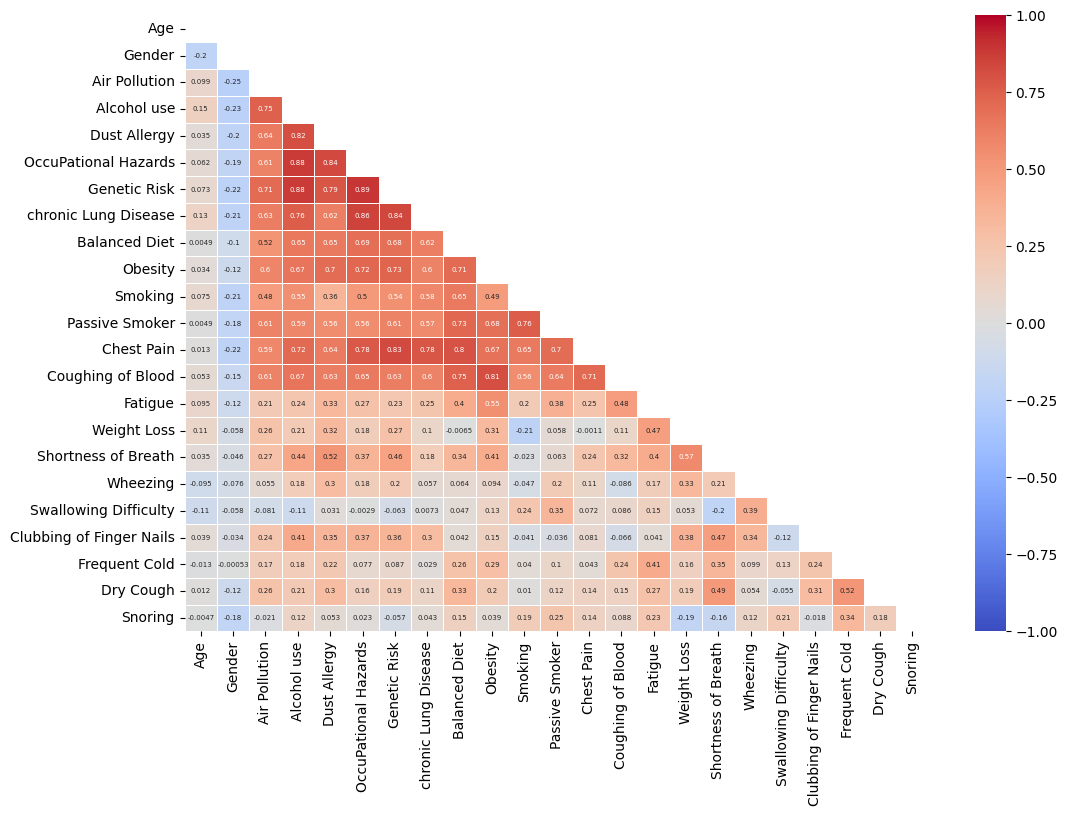

In [9]:
plt.figure(figsize=(12, 8)) 
cmap=sns.color_palette("coolwarm", as_cmap=True)
mask = np.triu(np.ones_like(features.corr()))
sns.heatmap(features.corr(),vmin=-1, vmax=1,annot=True,cmap=cmap,mask=mask, linewidths=0.5, annot_kws={"size": 5})

*Figure 3.*  _Correlation Heatmap of Lung Cancer Risk Factors. This heatmap depicts the correlation between the different factors influencing lung cancer risk._


In our exploratory data analysis, the correlation heatmap provided crucial insights into the factors influencing lung cancer risk. Notably, strong positive correlations were identified, such as between 'Genetic Risk' and 'Occupational Hazards' with a correlation value of 0.893 (Figure 3). This suggests a significant interaction, possibly reflecting the combined influence of genetic predispositions and environmental exposures on lung cancer susceptibility.

Other significant correlations include 'Occupational Hazards' and 'Alcohol use' (0.878), 'Alcohol use' and 'Genetic Risk' (0.877), as well as 'Chronic Lung Disease' with both 'Occupational Hazards' (0.858) and 'Genetic Risk' (0.836) (Figure 3). These findings highlight the compound nature of lung cancer risk, where lifestyle choices, occupational exposures, and genetic factors are intricately linked.

Conversely, some factors like 'Age' and 'Gender' showed minimal correlation with other variables, indicating their potential to independently modulate lung cancer risk.

While these correlations enhance the predictive power of our model, they also raise concerns about multicollinearity, which could skew the results by overestimating or underestimating the effects of certain variables. This necessitates careful feature selection and possibly employing dimensionality reduction techniques to maintain the integrity of our model.

It's important to note that correlation does not confirm causation. The observed relationships warrant further analysis using advanced statistical or machine learning methods to distinguish causative factors from those merely associated.

The absence of perfect correlations in the heatmap illustrates the complex interplay among the variables, underscoring the need for a sophisticated approach in model construction that accounts for these interactions. This will be further explored in our [Feature Selection](#section-2-feature-selection) section.

In conclusion, the correlation analysis underscores the complex interrelationships among the risk factors studied, emphasizing the need to consider these connections when developing a predictive model for lung cancer risk.

Below is a table that lists the correlations that have correlation values greater than 0.7 from the most to the least correlated, sorted in descending order.

In [10]:
cor_val = features.corr().unstack()
cor_val = cor_val.sort_values(ascending=False)
cor_val = cor_val[(abs(cor_val) != 1) & (abs(cor_val) > 0.7)]  # Filter for correlation values greater than 0.7
unique_pairs = {}
for pair in cor_val.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs[(pair[0], pair[1])] = cor_val[pair]
data = {'Pair': list(unique_pairs.keys()), 'Value': list(unique_pairs.values())}
df_unique_pairs = pd.DataFrame(data)
df_unique_pairs

,Pair,Value
0,"(Genetic Risk, OccuPational Hazards)",0.893049
1,"(OccuPational Hazards, Alcohol use)",0.878786
2,"(Alcohol use, Genetic Risk)",0.877210
3,"(chronic Lung Disease, OccuPational Hazards)",0.858284
4,"(chronic Lung Disease, Genetic Risk)",0.836231
5,"(Dust Allergy, OccuPational Hazards)",0.835860
6,"(Chest Pain, Genetic Risk)",0.831751
7,"(Alcohol use, Dust Allergy)",0.818644
8,"(Coughing of Blood, Obesity)",0.814805
9,"(Balanced Diet, Chest Pain)",0.798207


### Overall Conclusion for the EDA

The exploratory data analysis (EDA) conducted provides comprehensive insights into the dataset. The distribution analysis, including histograms and skewness, revealed that most features are relatively normally distributed with only a few showing moderate skewness, suggesting that extensive data transformation may not be necessary (Figure 1). The class distribution of the target variable is reasonably balanced, which bodes well for developing a model that doesn't require extensive rebalancing techniques (Figure 2). The correlation analysis highlighted several highly correlated features, which could be indicative of underlying factors that contribute to lung cancer risk or suggest potential redundancy within the data (Figure 3). 

The correlation heatmap, in particular, has elucidated complex interdependencies among the variables, pointing towards both potential multicollinearity concerns as well as interactions that may be significant in predicting lung cancer risk. The EDA has laid a solid foundation for informed feature selection and model construction. It has identified the need for possible dimensionality reduction or feature engineering to address multicollinearity and has set the stage for the application of predictive modeling techniques that can handle the complex relationships inherent in the data.

In conclusion, the EDA suggests that the dataset contains rich and relevant information for building a predictive model, with a depth of variables that reflect both individual and environmental factors associated with lung cancer risk. The subsequent sections will explain how we leveraged these insights to build a robust model capable of making accurate predictions.

# Section 2. Feature Selection

From the EDA results, we show a number of highly correlated features pairs. This prompt us to do feature engineering and remove at least one in each pair if possible without affecting the model's performance.
For our baseline model, SVM model is selected as it is a simple linear model and provides a benchmark against the performance of more complex models used later on.

We will use 3 feature selection methods from scikit-learn to be compare within the baseline SVM model using the evaluation metrics of accuracy score, percision, recall and F1-score.
- method 1: SelectKBest
- method 2: Principal Component Analysis (PCA)
- method 3: DecisionTree's Feature Importance

The following block of code extracts the features from the dataset and defines a helper function for quick evaluation of different feature selection used for the baseline model.

In [11]:
features = df.drop(["Patient Id","Level"], axis=1)
features.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


## Model 1: Baseline SVM model

In [12]:
X=features
y=df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A Naive SVM linear model will be used as benchmark of the feature selection.
def give_baseline_accuracy(feature_selection):
    X_train_subset = X_train[feature_selection]
    X_test_subset = X_test[feature_selection]
    linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
    linear_clf.fit(X_train_subset, y_train)
    y_pred = linear_clf.predict(X_test_subset)
    accuracy_ = accuracy_score(y_test, y_pred)
    #print("Accuracy: ", accuracy)
    return(accuracy_)

# Check accuracy using all features
give_baseline_accuracy(features.columns)

1.0

The baseline accuracy without any feature selection is 1. The following section will explore selections of features to see if it affects the accuracy. Given the already high accuracy achieved without scaling the features, our focus shifts to feature selection to avoid biasing the model. 

## Method 1: SelectKBest

SelectKBest is a feature selection technique commonly used in machine learning to choose the top 'k' most informative features from a dataset based on their statistical significance. It operates by scoring individual features using a specified scoring function, such as chi-squared, ANOVA F-value, or mutual information, and selecting the 'k' features with the highest scores.

The following block of code generates the 10 best features and evaluates them according to the baseline model. Correlation of the accuracy and number of k is also visualized.

Features:
Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
       'Chest Pain', 'Coughing of Blood'],
      dtype='object')
accuracy with default params: 0.925


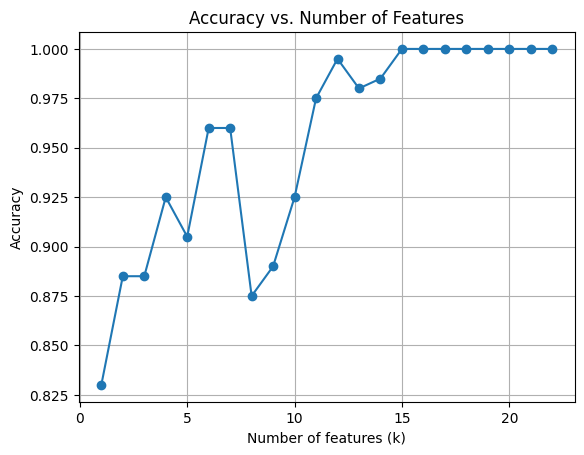

In [13]:
X_train_2 , X_test_2, y_train_2, y_test_2=X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#default parameters
select_k_best=SelectKBest()
x_col=select_k_best.fit_transform(X_train_2,y_train_2)
features_selected_method1=X_train_2.columns[select_k_best.get_support()]
print("Features:")
print(features_selected_method1)
accuracy_=give_baseline_accuracy(features_selected_method1)
print(f"accuracy with default params: {accuracy_}")

# Initialize lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Iterate over different values of k
for i in range(1, 23):
    select_k_best = SelectKBest(k=i)
    x_col = select_k_best.fit_transform(X_train_2, y_train_2)
    features_selected_method1 = X_train_2.columns[select_k_best.get_support()]
    accuracy = give_baseline_accuracy(features_selected_method1)
    
    # Store k value and accuracy
    k_values.append(i)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of features (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.grid(True)
plt.show()


_Figure 4. Baseline model accuracy against number of features for SelectKBest feature selection._

SelectKBest selects features using a statistical method such as the default ANOVA F-test for classification problems. It then selects k highest scoring features.  It defaults to k=10, the limited number of k probably explains why the accuracy goes down compared to the baseline. Using a higher k value generally leads to higher accuracy (Figure 4).

## Method 2: Principal Component Analysis (PCA)

Principal Component Analysis is an unsupervised learning method used for dimensionality reduction. By identifying the principal components (PC), which are linear combinations of the original variables, PCA simplifies complex datasets, and reveals underlying structures.

Since principal components maximizes capturing the variance of the data, a PCA plot can help visualize the overall linear relationship between the datapoints. The following subsection will visualize the PCA plot, and then extract the features that make up the principal components.

Note: top 5 features from each principal component will be extracted.
- Method 2a: Uses 2 PC
- Method 2b: Uses 3 PC

In [14]:
x = features
y=df["Level"]
n_comp=10
pc_list = [f"PC{i+1}" for i in range(n_comp)]
pca = decomposition.PCA(n_components=n_comp)
pc = pca.fit_transform(x)
pc_df = pd.DataFrame(data=pc,columns=pc_list)
pc_df['Label'] = y

var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'PC':pc_list})

#txt = "figure caption"

#Make a 3D plot for the PC
figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label",)
figure.update_layout(showlegend=True,
                     scene=dict(
                         xaxis_title="PC1 ("+ str(round(var['Variance'][0]*100,2)) + "%)",
                         yaxis_title="PC2 ("+ str(round(var['Variance'][1]*100,2)) + "%)",
                         zaxis_title="PC3 ("+ str(round(var['Variance'][2]*100,2)) + "%)"
                     ))
#figure.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
figure.show()


_Figure 5. 3D PCA plot showing the first 3 principal components of the Lung Cancer Prediction features._

From the 3d plot, the 1st, 2nd, and 3rd PC contributes to 59.54%, 18.00% and 5.49% of variance respectively.
Even from using PC1 and PC2 alone, it accounts for 77.6% of the variance (Figure 5).

The following block of code takes the most important features from 2 PCs.

In [15]:
n_pcs = 2

model = decomposition.PCA(n_components=n_pcs).fit(X_train)
f_ordered = [np.argsort(model.components_[i]) for i in range(n_pcs)]
feature_names = features.columns
f = []
for i in range(n_pcs):
    x = [feature_names[j] for j in f_ordered[i]]
    f.append(x)
# 5 most important features in each PC 
# get the last 5 features (features sorted in increasing order of importance)
# reverse list to sort by most important 
ls = [f[i][-5:][::-1] for i in range(n_pcs)]
data = [['PC{}'.format(i)]+ls[i] for i in range(n_pcs)]
df_features = pd.DataFrame(data,columns=["PC",1,2,3,4,5])
final_features = ls[0] + ls[1]
final_features_method2a = list(dict.fromkeys(final_features))
print("Features:")
print(final_features_method2a)
# baseline_accuracy(final_features_method2a)
method2a_accuracy=give_baseline_accuracy(final_features_method2a)
print(f"Accuracy: {method2a_accuracy}")

Features:
['Age', 'Alcohol use', 'Smoking', 'chronic Lung Disease', 'Fatigue', 'Coughing of Blood', 'Chest Pain', 'Genetic Risk', 'OccuPational Hazards']
Accuracy: 0.945


The following block of code takes the most important features from 3 PCs.

In [16]:
n_pcs = 3

model = decomposition.PCA(n_components=n_pcs).fit(X_train)
f_ordered = [np.argsort(model.components_[i]) for i in range(n_pcs)]
feature_names = features.columns
f = []
for i in range(n_pcs):
    x = [feature_names[j] for j in f_ordered[i]]
    f.append(x)

# 5 most important features in each PC 
# get the last 5 features (features sorted in increasing order of importance)
# reverse list to sort by most important 
ls = [f[i][-5:][::-1] for i in range(n_pcs)]
data = [['PC{}'.format(i)]+ls[i] for i in range(n_pcs)]
df_features = pd.DataFrame(data,columns=["PC",1,2,3,4,5])
final_features = ls[0] + ls[1] + ls[2]
final_features_method2b = list(dict.fromkeys(final_features))
print("Features:")
print(final_features_method2b)
method2b_accuracy=give_baseline_accuracy(final_features_method2b)
print(f"Accuracy: {method2b_accuracy}")

Features:
['Age', 'Alcohol use', 'Smoking', 'chronic Lung Disease', 'Fatigue', 'Coughing of Blood', 'Chest Pain', 'Genetic Risk', 'OccuPational Hazards', 'Shortness of Breath', 'Weight Loss', 'Clubbing of Finger Nails', 'Dry Cough', 'Wheezing']
Accuracy: 1.0


Looking at the PCA plot, PC1 is unable to show separation between the 3 classes. This meaning most variance captured by PC1 are mostly variance within the classes.
However, PC2 and PC3 are able to capture the class separation better.

This probably explains why using only 2 PC for the feature selection doesn't yield as good accuracy as using 3 PC.

## Method 3: DecisionTree's Feature Importance

Decision tree algorithm offer insight into feature importance. By analyzing the splits within the tree, decision trees assign importance scores to each feature based on their contribution to reducing impurity or maximizing information gain. This helps in understanding the relative significance of different features in predicting the target outcome, ideal for feature selection.

In [17]:
clf = DecisionTreeClassifier()

# Train decision tree classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(list(X_train.columns), feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Coughing of Blood: 0.3734
Wheezing: 0.2579
Obesity: 0.1290
Snoring: 0.1131
Air Pollution: 0.0713
Clubbing of Finger Nails: 0.0327
Balanced Diet: 0.0225
Age: 0.0000
Gender: 0.0000
Alcohol use: 0.0000
Dust Allergy: 0.0000
OccuPational Hazards: 0.0000
Genetic Risk: 0.0000
chronic Lung Disease: 0.0000
Smoking: 0.0000
Passive Smoker: 0.0000
Chest Pain: 0.0000
Fatigue: 0.0000
Weight Loss: 0.0000
Shortness of Breath: 0.0000
Swallowing Difficulty: 0.0000
Frequent Cold: 0.0000
Dry Cough: 0.0000


In [18]:
features_selected_method3 = ['Coughing of Blood', 'Wheezing', 'Obesity', 'Snoring', 'OccuPational Hazards', 'Clubbing of Finger Nails']
print("Features:")
print(features_selected_method3)
# baseline_accuracy(features_selected_method3)
method3_accuracy=give_baseline_accuracy(features_selected_method3)
print(f"Accuracy: {method3_accuracy}")

Features:
['Coughing of Blood', 'Wheezing', 'Obesity', 'Snoring', 'OccuPational Hazards', 'Clubbing of Finger Nails']
Accuracy: 0.995


Selecting features that are deemed non 0 by the feature importanve gives an accuracy of 0.995, lower from that of baseline model. This may be due to the use of too few features, causing the model to slightly underfit.

## Features selection results

From the 4 accuracies obtained from the different methods are as follows.
- Baseline: 1.000

- Method 1: 0.925 (SelectKBest)
- Method 2a: 0.945 (2 PC)
- Method 2b: 1.000 (3 PC)
- Method 3: 0.995 (DecisionTree's Feature Importance)

Method 2b yields the least amount of features yet maximixing accuracy. The PCA method that it was derived from also highlights clearer separation of the classes using combination of features as a whole rather than looking at them individually like the other methods.

Thus the features from Method 2b will be used for subsequent model training.

In [19]:
final_features_method2b

['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

# Section 3: Proving linear separability of our dataset
Since we achieved a model accuracy of 100% using a linear SVM model, we aim to prove that our data is linearly separable.

## Method 1: PCA
We attempt to prove that a linear model is sufficient to predict our class labels using PCA
- Attempt 1: Prove linear separability using the whole feature set 
- Attempt 2: Prove linear separability using selected features from method 2b

### Define functions 
- pca_tranform performs PCA on a feature set (x), where n_comp is the number of principal components to keep. This means that n_comp is the number of dimensions that we would like to reduce the feature space to. We also append the class labels for ease of visualisation.

- plot_PCA_2D and plot_PCA_3D takes in the output of pca_transform and plots for all datapoints where PC1 against PC2 and PC1 against PC2 against PC3 respectively

- Additionally, each datapoint is colored with its class label to observe the class separation (if any).


In [20]:
def pca_transform(x, y, n_comp):
  pc_list = [f"PC{i+1}" for i in range(n_comp)]
  pca = decomposition.PCA(n_components=n_comp)
  pc = pca.fit_transform(x)
  pc_df = pd.DataFrame(data=pc,columns=pc_list)
  pc_df['Label'] = y
  return pc_df, pca, pc_list

def plot_PCA_2D(pc_df, pca, pc_list):
    var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,'PC':pc_list})
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    
    sns.barplot(x='PC',y="Variance", data=var,ax=ax[0])
    for i in ax[0].containers:
       ax[0].bar_label(i,fmt='%.2f')

    sns.scatterplot( x="PC1", y="PC2",data=pc_df, hue='Label',legend=True,ax=ax[1],s=50)

def plot_PCA_3D(pc_df, pca):
    pca_var_sum=sum(pca.explained_variance_ratio_[:4])
    figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label")
    figure.update_layout(showlegend=True)
    figure.show()

### Attempt 1: All features 

In [21]:
# Change labels to one hot encoding
df['Level_hot_encode'] = df['Level'].apply(lambda x: ["Low", "Medium", "High"].index(x))

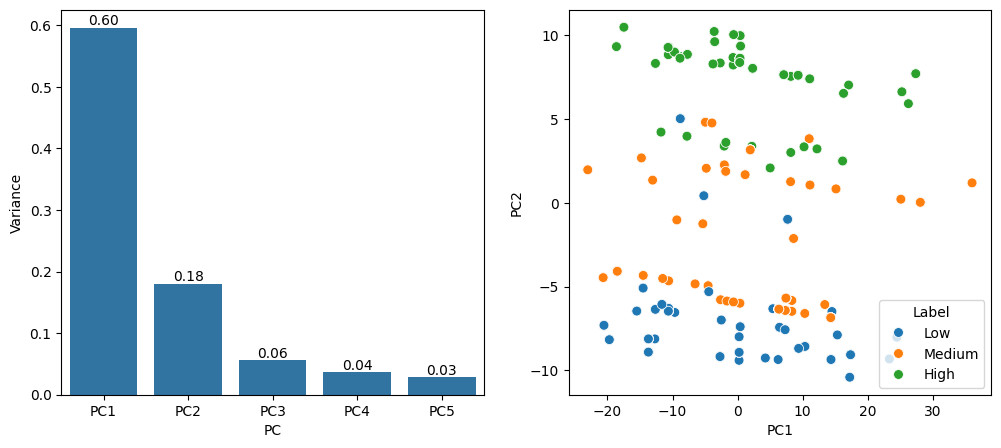

In [22]:
n_comp=5
y=df["Level"]
pc_df, pca, pc_list= pca_transform(features, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

*Figure 6. PCA results generated using the full dataset and all its features. (Left) Barplot indicating the variance per Principal Component, with PC1 and PC2 having a high cumulative variance of 78%. (Right) Unclear separation of classes shown in the scatterplot generated using PC1 and PC2.*

First, we observe the overall PCA separation of all datapoints. Based on Figure 6 (Left), we observe that the principal components PC1, PC2, and PC3 explains 60%, 18%, and 6% respectively of the total variance in the original dataset.

From Figure 6 (Right), we observe that datapoints with "Low" label is clearly separated from datapoints with "High" label. However, we observe that some datapoints with "Medium" labels overlap with those with either "Low" or "High" labels. This suggest that PC1 and PC2 are less unable to discern "Medium" labels from "Low" and "High" labels. This observation is also apparent in the 3D plot shown in Figure 7. 

In [23]:
plot_PCA_3D(pc_df, pca)

*Figure 7. Unclear separation of classes shown in the 3D PCA plot of PC1, PC2, PC3 generated from the full dataset and all its features.*

#### Attempt to prove pairwise separability of labels 
Since "Low" and "High" labels are clearly linear separable, it remains to be seen that ("Low" and "Medium") and ("Medium" and "High") labels are linear separable as well. 

To do so, remove one of the class labels to perform one vs one classificaiton. For example, remove "High" label to check linear separability of "Low" and "Medium" labels only. 

##### Low vs Medium

(635, 23)


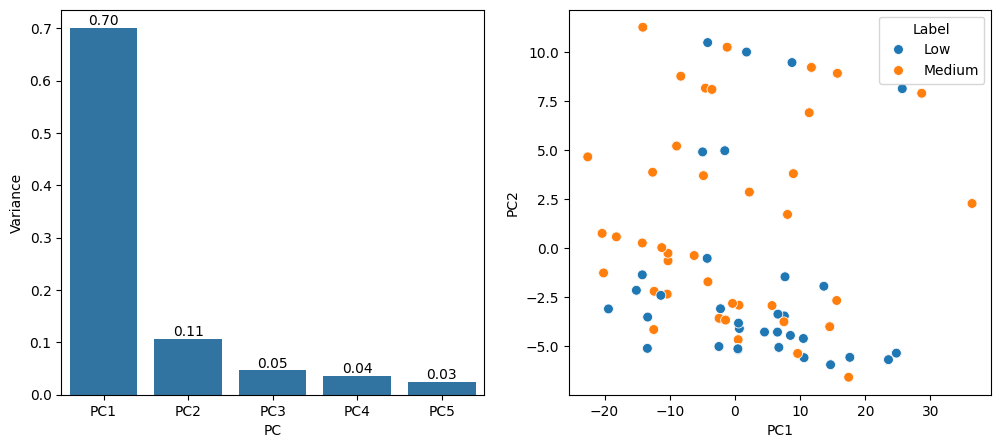

In [24]:
df_low_medium = df.loc[df["Level"].isin(["Low","Medium"])]
x=df_low_medium.drop(["Patient Id","Level", "Level_hot_encode"], axis=1)
x=x[features.columns]
print(x.shape)
y=df_low_medium["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

*Figure 8. PCA results generated using all features and the subset of datapoints labeled Low and Medium only. (Left) Barplot indicating the variance per Principal Component, with PC1 and PC2 haing a high cumulative variance of 81%. (Right) Poor separation of classes shown in the scatterplot generated using PC1 and PC2.*

In [25]:
plot_PCA_3D(pc_df, pca)

*Figure 9. Poor separation of classes shown in the 3D PCA plot of PC1, PC2, PC3 generated using all features and the subset of datapoints labeled Low and Medium only.*

##### Medium vs High

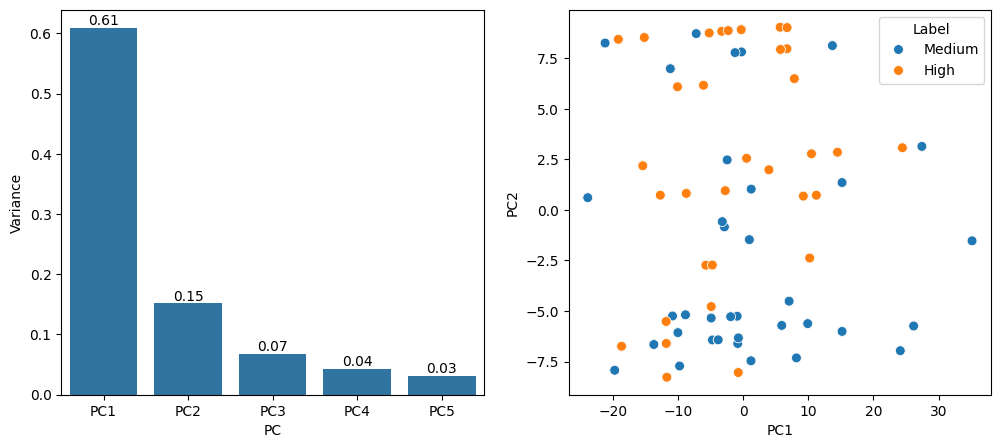

In [26]:
df_medium_high = df.loc[df["Level"].isin(["Medium","High"])]
x=df_medium_high.drop(["Patient Id","Level", "Level_hot_encode"], axis=1)
x=x[features.columns]
y=df_medium_high["Level"]
n_comp=5
pc_list = [f"PC{i+1}" for i in range(n_comp)]
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

*Figure 10. PCA results generated using all features and the subset of datapoints labeled Medium and High only. (Left) Barplot indicating the variance per Principal Component, with PC1 and PC2 haing a high cumulative variance of 81%. (Right) Poor separation of classes shown in the scatterplot generated using PC1 and PC2.*

In [27]:
plot_PCA_3D(pc_df, pca)

*Figure 11. Poor separation of classes shown in the 3D PCA plot of PC1, PC2, PC3 generated using all features and the subset of datapoints labeled Medium and High only.*

We observe that in both cases, removing one of the class labels resulted in worse separation by PCA, where the linear boundary is non-existent (Figures 8 and 10). This was also apparent in the subsequent 3D plots, even though an additional PC was included (Figures 9 and 11). This suggest that the data points from the removed class play an important role in the model's ability to accurately predict all class labels. When we remove one of the classes, we are discarding around 30% of our dataset which essentially decreases the variability of the set. Since PCA aims to maximise variance, the overall decrease in variability of our dataset may have hindered the ability of PCA to identify principal components that separate our data. 

### Attempt 2: Selected features

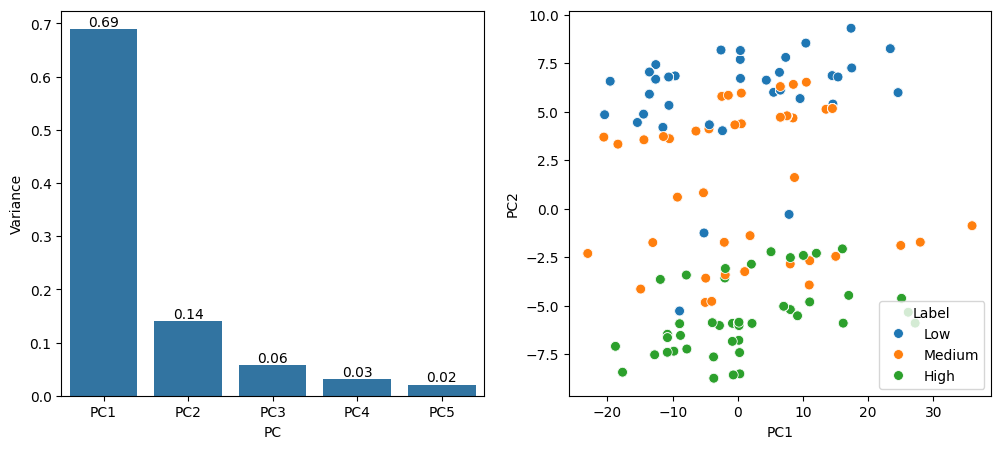

In [28]:
n_comp=5
x = features[final_features_method2b]
y = df["Level"]
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

*Figure 12. PCA results generated using the full dataset and selected features from Method 2b. (Left) Barplot indicating the variance per Principal Component, with PC1 and PC2 having a high cumulative variance ratio of 83%. (Right) Unclear separation of classes shown in the scatterplot generated using PC1 and PC2.*

In [29]:
plot_PCA_3D(pc_df, pca)

*Figure 13. Poor separation of classes shown in the 3D PCA plot of PC1, PC2, PC3 generated using the full dataset and the selected features from Method 2b.*

The cumulative variance of PC1 and PC2 using the features selected in method 2b was 83% (Figure 12, Left), higher than that of attempt 1 with 78% cumulative variance (Figure 6). However, we observe that the overall PCA results are almost similar to that of attempt 1 (Figure 12, Right). 

## Method 2: LDA
Since PCA did not seem to adequately prove linear separability of our dataset, we moved on to try Linear Discriminant Analysis (LDA). PCA is an unsupervised method which aims to capture the direction of maximum variance in the data. On the other hand, LDA is a supervised method which aims to find the projection that maximises class separability while minimising the variance within each class. Hence, LDA could better identify the linear boundary between classes. 

### Define functions
- The custom LDA function can be broken down into 3 main parts. First, we used scikit-learn library's LinearDiscriminantAnalysis model to fit and transform our training dataset. Second, we extract the explained and cumulative variance ratio from the linear discriminants. The explained variance ratio descibes the variance captured by each linear discriminant while the cumulative variance ratio describes the accumulation of variance for each linear discriminant. Since we have 3 classes, the maximum number of linear discriminants that we can find is 2 (max linear discriminants = no. of class labels - 1). Last, we plot the cumulative explained variance against the number of linear discriminants to understand the amount of variance in the dataset that is captured by LDA.

- The custom SVM function provides a visual representation of how well the SVM classifier seperates the 3 classes in the datasets based on features from LDA transformation. It can be broken down into 2 main parts. First, we fit that dataset using the same baseline SVM model and computes the model's accuracy. Subseuqnetly, it creates two subplots to visualise the decision boundary for both training and testing sets. In each subplot, it predicts a class labels using the trained SVM classifier and plots the data points coloured by the class to illustrate how the decision boundaries separates different classes.

In [30]:
def LDA(X_train, X_test,y_train):
    # Fit and transform 
    lda = LinearDiscriminantAnalysis()
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    # Cumulative variance + explained variance 
    explained_var_ratio=lda.explained_variance_ratio_
    cumulative_var_ratio=np.cumsum(explained_var_ratio)
    lda_df = pd.DataFrame()
    lda_df['Cumulative Variance Ratio'] = cumulative_var_ratio
    lda_df['Explained Variance Ratio'] = explained_var_ratio
    display(lda_df)
    # Plot 
    sns.set(style='whitegrid')
    plt.plot(cumulative_var_ratio)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

    return X_train_lda, X_test_lda

def SVM_visualisation(X_train_lda,X_test_lda, y_train,y_test):
    linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
    linear_clf.fit(X_train_lda, y_train)
    y_pred = linear_clf.predict(X_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)

    # Training results 
    X_set, y_set = X_train_lda, y_train

    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    X1 = np.array(X1, dtype=float)
    X2 = np.array(X2, dtype=float)
    input_array = np.column_stack((X1.ravel(), X2.ravel()))
    Z = linear_clf.predict(input_array)
    Z = Z.reshape(X1.shape)
    Z = np.array(Z, dtype=float)

    fig, ax = plt.subplots(1,2,figsize=(12,5))
    
    ax[0].contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
    ax[0].set_xlim(X1.min(), X1.max())
    ax[0].set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        label = df[df["Level_hot_encode"]==j].iloc[0]["Level"]
        ax[0].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = label)
    ax[0].set_title('SVC (Training set)')
    ax[0].set_xlabel('LD1')
    ax[0].set_ylabel('LD2')

    # Testing results 
    X_set, y_set = X_test_lda, y_test

    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    X1 = np.array(X1, dtype=float)
    X2 = np.array(X2, dtype=float)
    input_array = np.column_stack((X1.ravel(), X2.ravel()))
    Z = linear_clf.predict(input_array)
    Z = Z.reshape(X1.shape)
    Z = np.array(Z, dtype=float)
    
    ax[1].contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
    ax[1].set_xlim(X1.min(), X1.max())
    ax[1].set_ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        label = df[df["Level_hot_encode"]==j].iloc[0]["Level"]
        ax[1].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = label)
    ax[1].set_title('SVC (Testing set)')
    ax[1].set_xlabel('LD1')
    ax[1].set_ylabel('LD2')
    plt.legend()
    plt.show()
    

### Attempt 1: All features

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.881365,0.881365
1,1.000000,0.118635


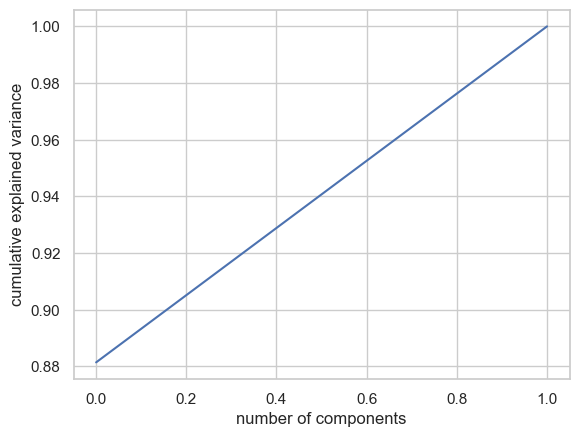

In [31]:
x = features
y = df["Level_hot_encode"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train_lda, X_test_lda = LDA(X_train, X_test, y_train)

*Figure 13. 100% cumulative variance from LD1 and LD2, generated using the full dataset and all its features.*

We observe that the explained variance ratio of LD1 and LD2 are 88% and 12% respectively. Further, the cumulative variance ratio of LD1+LD2 is 100% (Figure 13). This suggest that LD1 and LD2 are able to capture all the variance in the dataset.

Accuracy:  0.97


/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_60186/1618203580.py:48: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_60186/1618203580.py:71: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



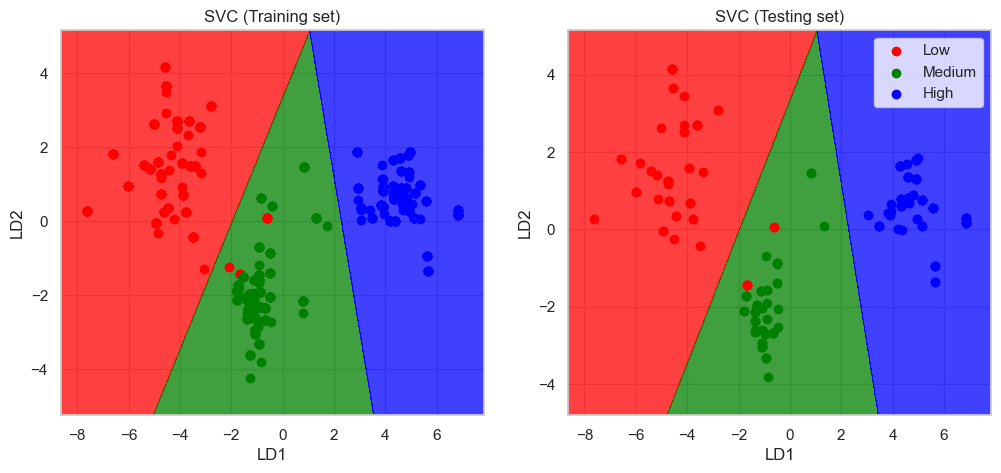

In [32]:
SVM_visualisation(X_train_lda,X_test_lda, y_train,y_test)

*Figure 14. SVM trained on features transformed by LDA (using the full dataset and all its features). Clear boundaries between classes with few misclassifications of datapoints labeled Low.*

From Figure 14, we see that clusters form based on their class label with a clear linear boundary between each class label. However, we see that some datapoints with label "Low" are falsely predicted to be of "Medium" label, which also explains the slightly lower model accuracy of 97%. The lower model accuracy may be attributed to the high number of features (i.e. curse of dimensionality), leading to lower model performance.

### Attempt 2: Selected features 
The curse of dimensionality happens when we have too many features but insufficient data to generalise a model accurately. In our case, we have 23 features but only 1000 datapoints, which may result in lower model performance, particularly when employing dimensionality reduction techniques like LDA. Moreover, many features may add irrelevant information, increasing the signal-to-noise ratio. Hence, it is impactful to observe whether using a selected set of features, followed by compression via LDA, could improve the results of linear separability of our data. 

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.937679,0.937679
1,1.000000,0.062321


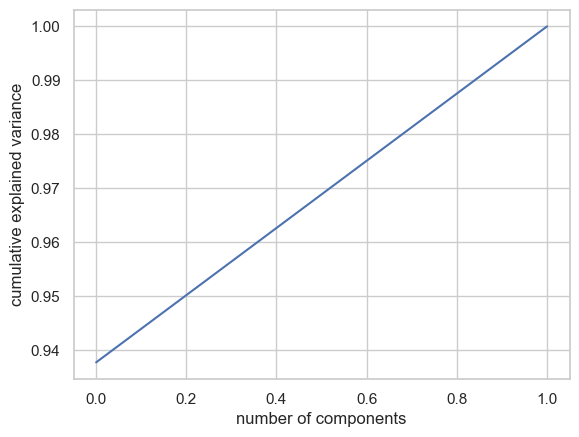

In [33]:
x = features[final_features_method2b]
y = df["Level_hot_encode"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train_lda, X_test_lda = LDA(X_train, X_test, y_train)

*Figure 15. 100% cumulative variance from LD1 and LD2, generated using the full dataset and selected features from Method 2b.*

We observe that the explained variance ratio of LD1 and LD2 are 93% and 6% respectively (Figure 15). Compared to attempt 1, LDA1 (attempt 2) explains more variance of the data, suggesting that feature extraction does help to improve the model's ability to learn the features of the data. Similarly, we observe a cumulative variance ratio of 100%.

Accuracy:  0.99


/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_60186/1618203580.py:48: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_60186/1618203580.py:71: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



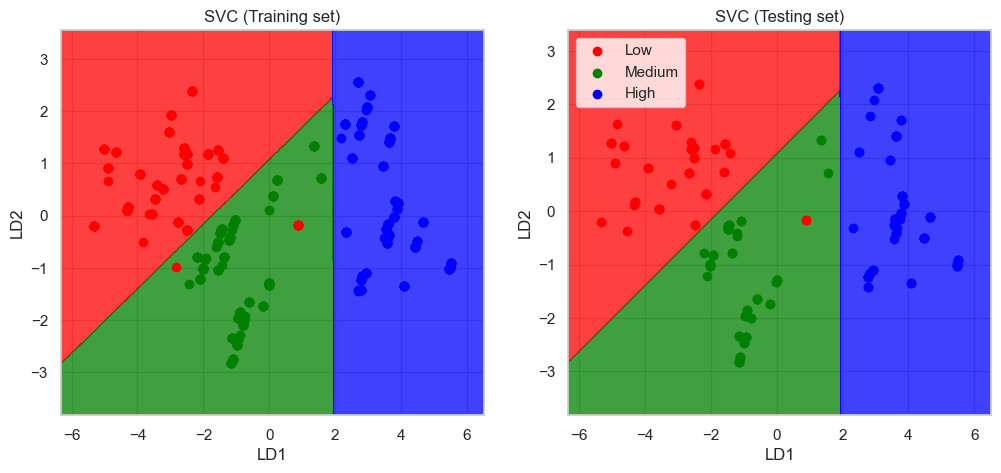

In [34]:
SVM_visualisation(X_train_lda,X_test_lda, y_train,y_test)

*Figure 16. SVM trained on features transformed by LDA (using the full dataset and features selected from Method 2b). Clear boundaries between classes with few misclassifications of datapoints labeled Low.*

From Figure 16, we see that clusters form based on their class label with a clear linear boundary between each class label. Compared to attempt 1, we observe fewer data points with the "Low" labels that are wrongly predicted as "Medium". This is further supported by a higher model accuracy of 99%. Overall, we can conclude that the selected features are not only sufficient to prove linear separability of our data but also help improve the training of the model.

# Section 4. Simple Models
For our multiclass classification task, we first chose two simple models to explore different aspects of predictive performance. Model 1 is a Logistic Regression model and Model 2 is a KNN model.

In [35]:
X= X[final_features_method2b]
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

## Model 2. Logistic Regression

Logistic Regression is a linear classifier that models the relationship between features and predicts the probability of an instance belonging to a particular class using the sigmoid function. This method allows us to assess performance against our baseline model which is a linear classifier and validate our baseline model's ability to effectively separate data points linearly.

*Parameters:*
- C (Regularization Parameter): This parameter controls the inverse of regularization strength. A larger "C" will lead to a weaker regularisation, generating a more complex model, vice-versa.
- solver: Algorithm to use in the optimization problem. 
- penalty: This parameter specifies the norm used in the penalization term. The two most common choices are:
    - L1 Penalty which encourages sparsity by reducing the number of non-zero coefficients
    - L2 Penalty which shrinks coefficients towards zero to prevent overfitting. 
- However, due to compatability issue between L1 penalty and some solvers, we stick with the default settings for both parameters.

### Define functions 

- **gridsearch_method** undergoes a few steps:
    - utilise scikit-learn's GridSearchCV to exhaustively search various hyperparameter combinations provided, aiming to find the most optimal settings for our model. It divides the data into k subsets (defaulting to k=5). During this process, the 'fit' method of GridSearchCV concurrently trains the Classifier on k-1 subsets of the training data ('X_train' and 'y_train'), iteratively testing different hyperparameter configurations with the remaining subset for each fold. 
    - Retrieve Best Estimator: After fitting, the **'best_estimator_'** and its respective **'best_score_'** attribute of the clf object provides the best estimator based on the accuracy found by the GridSearchCV after performing the grid search over the specified hyperparameter space.
    - Retrieve the predicted labels on the test dataset from the model with the best parameters and print out the accuracy score.

In [36]:
@ignore_warnings(category=ConvergenceWarning)
def gridsearch_method(model, params, model_name, cv_=5):
    global X_train, X_test, y_train, y_test
    grid=GridSearchCV(model, param_grid=params, cv=cv_)
    grid.fit(X_train, y_train)
    print(f'Best {model_name} hyperparameters: {grid.best_estimator_}')
    print(f'Best {model_name} validation score: {grid.best_score_}')
    y_pred=grid.predict(X_test)
    accuracy_=accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy on test set: {accuracy_}')
    return grid, y_pred

In [37]:
def evaluation_metrics(y_true, y_pred, model_name, average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_true, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_true, y_pred)
    unique_labels = ["Low", "Medium", "High"]
    sorted_label_ind=[sorted(unique_labels).index(x) for x in unique_labels]
    confusion_scores_matrix_sorted = confusion_scores_matrix[:, sorted_label_ind][sorted_label_ind, :]
    plt.figure(figsize=(10, 6))
    # unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    sns.heatmap(
        
        confusion_scores_matrix_sorted, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
        xticklabels=["Low", "Medium","High"],
        yticklabels=["Low", "Medium","High"]
    )
    
    # ax.set_title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')
    plt.yticks(rotation=360)
    plt.show()

In [38]:
logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l2'],'max_iter': [1500]}
logreg, y_pred_logreg=gridsearch_method(model=LogisticRegression(), params= logreg_params, model_name="Logistic Regression")


Best Logistic Regression hyperparameters: LogisticRegression(C=1, max_iter=1500)
Best Logistic Regression validation score: 0.9985714285714286
Logistic Regression accuracy on test set: 1.0


### Manual exploration for hyperparameters in Logistic Regression
Given the single main hyperparameter, "C," inherent in Logistic Regression, we visualised its impact on accuracy. We executed the Logistic Regression model across a range of C values, spanning from 0.001 to 100.


### Define functions

- **explore_logistic_regression** is specifically designed for Logistic Regression, allowing for comparison across different Logistic Regression models with varying feature engineering or modifications if necessary. By plotting accuracy performance against different C values, it offers insights into parameter effects and the bias-variance trade-off.

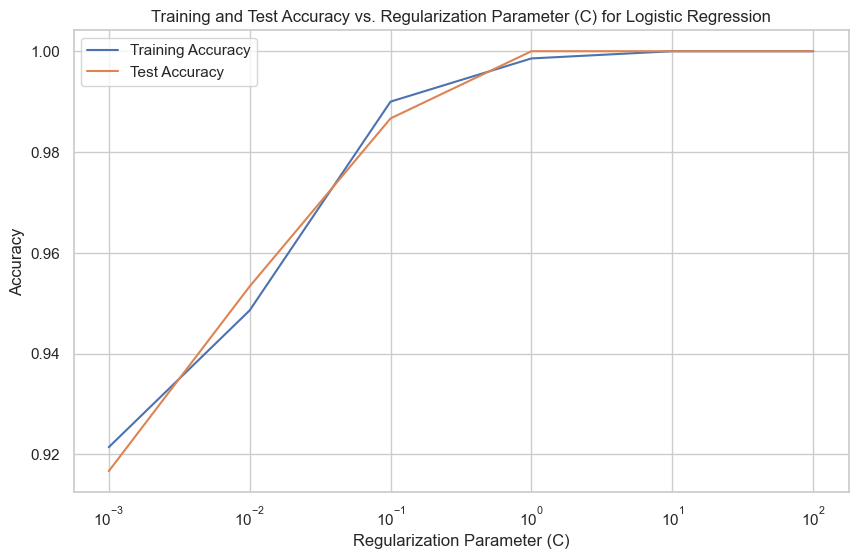

In [39]:
@ignore_warnings(category=ConvergenceWarning)
def explore_logistic_regression(C_values):
    global X_train, X_test, y_train, y_test
    train_lst = []
    test_lst = []
    
    for C_value in C_values:
        # Create and fit the logistic regression model
        logreg = LogisticRegression(C=C_value, max_iter=1000)
        logreg.fit(X_train, y_train)
        
        # Compute training error
        train_preds = logreg.predict(X_train)
        train_acc_score= accuracy_score(y_train, train_preds)
        train_lst.append(train_acc_score)
        
        # Compute test error
        test_preds = logreg.predict(X_test)
        test_acc_score= accuracy_score(y_test, test_preds)
        test_lst.append(test_acc_score)
    
    # Plot errors
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, train_lst, label="Training Accuracy")
    plt.plot(C_values, test_lst, label="Test Accuracy")
    plt.xscale('log')  #log scale for C values
    plt.ylabel("Accuracy")
    plt.xlabel("Regularization Parameter (C)")
    plt.title("Training and Test Accuracy vs. Regularization Parameter (C) for Logistic Regression")
    plt.legend()
    plt.show()

# Example usage:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
explore_logistic_regression(C_values)
 

*Figure 17. Graph of Training and Test Accuracy agaisnt a range of Regularization Parameter (C) from 0.001 to 100 in the Logistic Regression model employed.*

As "C" increases from 0.001 to 100, both training and test accuracy improve (Figure 17). This suggest that when employing a strong regularisation (smaller "C" value), the model will become simpler, exhibiting underfitting, particularly when excessively low "C" values is used. This could be due to the high bias observed. <br>

Notably, the model maintain relatively high accuracy overall across the "C" values but peaks between 10 and 100 in "C" (Figure 17). The higher spectrum of the "C" values in the graph suggest that weak regularisation in the linear model yields the optimal performance in predicting the classification of our dataset. However, we opted for optimal value of 10, as it is closer to the default value (C=1), aiming to prevent excessively high variance and enhance generalisation performance.

### Evaluation of Model 2

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


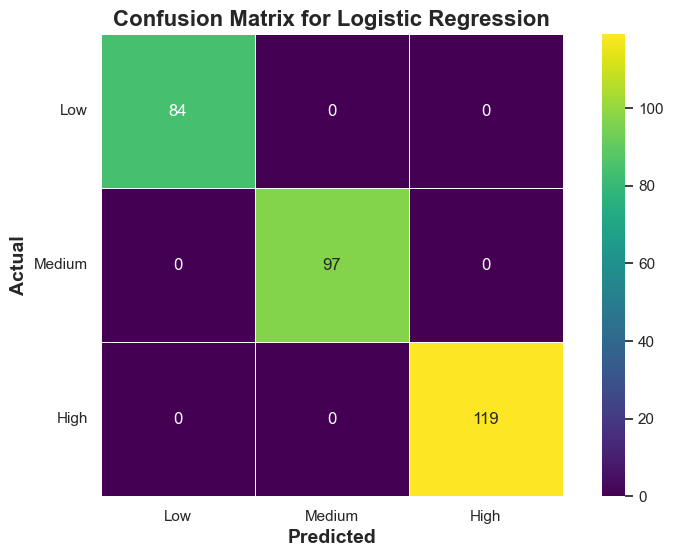

In [40]:
evaluation_metrics(y_test, y_pred_logreg, 'Logistic Regression', average_type='macro')

*Figure 18. The confusion matrix for Logistic Regression. The heatmap illustrates classification results with "Low," "Medium," and "High" labels, while side labels show counts for each prediction.*

Similar to the baseline model, the Logistic Regression model achieves perfect classification accuracy on the test set, as evidenced by a lack of misclassifications observed in the confusion matrix (Figure 18). Consequently, precision, recall, and F1-score all attained a value of 1. This validates the suitability of using linear models for predicting the risk lung cancer occurrence in the dataset.

Furthermore, feature engineering applied to the dataset highlight the effectiveness of the chosen features in capturing relevant information for the classification task.

## Model 3: k-nearest neighbors (KNN)
KNN model is a simple yet expressive method that allows us to handle complex decision boundaries as it adeptly captures local data structure by considering the nearest neighbors. This makes it a valuable addition to our analysis.
*Parameters:*
- n_neighbours: Determines the number of nearest neighbors to consider when making predictions. Adjusting this parameter impacts the model's flexibility.
- p: Represents the power parameter for the Minkowski distance metric. When p=1, it is equivalent to using Manhattan distance (L1), and when p=2, it is equivalent to using Euclidean distance (L2). This has an impact on the distance calcualtion and could affect the results.

In [41]:
knn_params = {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3]}
knn_, y_pred_knn=gridsearch_method(model=KNeighborsClassifier(), params= knn_params, model_name="KNN")

Best KNN hyperparameters: KNeighborsClassifier(n_neighbors=3, p=1)
Best KNN validation score: 0.9985714285714286
KNN accuracy on test set: 0.9966666666666667


### Manual exploration for hyperparameters in KNN
Similarly, KNN has one main parameter, "n_neighbours", representing the number of nearest neighbors. Here, we ran the KNN model across a range of k_neighbours values, spanning from 1 to 20.

### Define functions
- **explore_kNN** is specifically designed for KNN, allowing for comparison across different KNN models with varying feature engineering or modifications if necessary. By plotting accuracy performance against different k_neighbours values, it offers insights into parameter effects and the bias-variance trade-off.

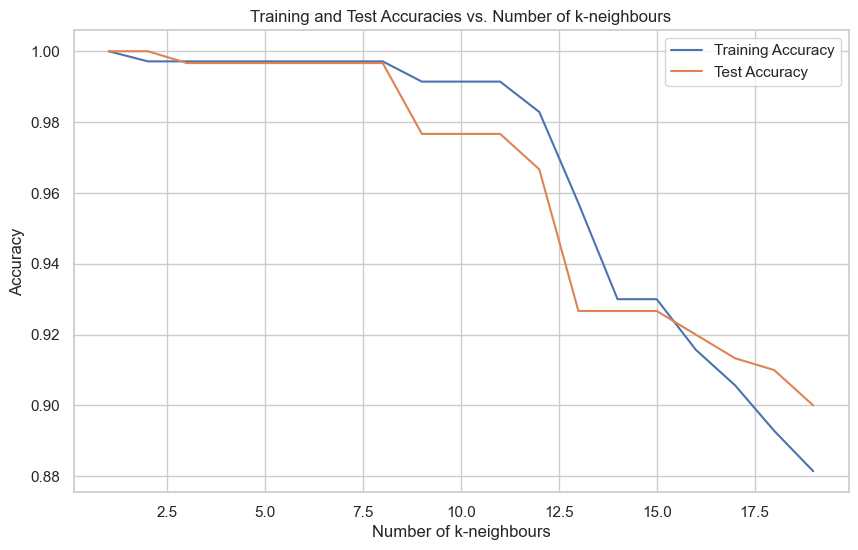

In [42]:
# Define the range of neighbors
k_neighbours_lst = range(1, 20)

def explore_kNN(k_neighbours_lst):
    global X_train, X_test, y_train, y_test
    train_lst=[]
    test_lst=[]


    for neighbour in k_neighbours_lst:
        knn = KNeighborsClassifier(n_neighbors=neighbour)
        knn.fit(X_train, y_train)
        train_preds=knn.predict(X_train)
        train_acc_score= accuracy_score(y_train, train_preds)
        train_lst.append(train_acc_score)
        test_preds=knn.predict(X_test)
        test_acc_score= accuracy_score(y_test, test_preds)
        test_lst.append(test_acc_score)

    # print(k_neighbours_lst, train_lst)
    # print(k_neighbours_lst, test_lst)
    plt.figure(figsize=(10, 6))
    plt.plot(k_neighbours_lst, train_lst, label="Training Accuracy")
    plt.plot(k_neighbours_lst, test_lst, label="Test Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Number of k-neighbours")
    plt.title("Training and Test Accuracies vs. Number of k-neighbours")
    plt.legend()
    plt.show()


explore_kNN(k_neighbours_lst)

*Figure 19. Graph of Training and Test Accuracy agaisnt a range of k from 1 to 20 in the kNN model employed.*

Across the range of k values from 1 to 12, both test and training accuracy remained consistently high (Figure 19). This indicates the model's ability to achieve perfect to almost-prefect accuracy on the test data when using the selected features and the range of hyperparameters. This suggests that the model's performance on unseen data (test set) is generally excellent. However, for optimal performance, we chose value of k=3 onwards as a very small k of k=1 or 2 can lead to excessively high variance and overfitting for future dataset. 

However, in Figure 19, beyond k=12, there is notable drop in test accuracy drop. This occurs because the larger "k" values results in the decision boundary to be too smooth, overlooking important patterns in the data, which leads to high bias and underfitting.

### Evalutation of Model 3

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


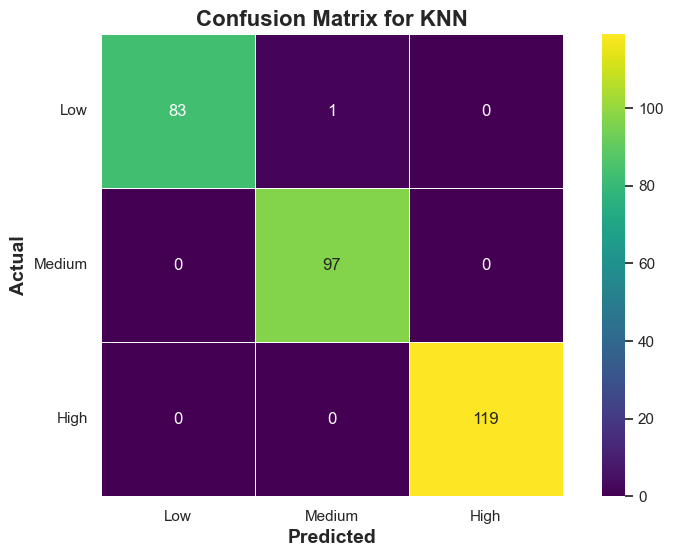

In [43]:
evaluation_metrics(y_test, y_pred_knn, 'KNN', average_type='macro')


*Figure 20. The confusion matrix for KNN. The heatmap illustrates classification results with "Low," "Medium," and "High" labels, while side labels show counts for each prediction.*

Although Figure 20 exhibits KNN having 1 label being misclassified, resulting in the F1 score for the "Low" class to be 0.994, the macro-average of the F1-score is 0.998, which round to 1.000 when formatted to 3dp. This highlights the robust performance of the KNN model in accurately predicting the risk of lung cancer occurrence across the dataset.

To conclude,  both models (logistic regression and KNN) exhibit excellent performance on the given dataset, even when using a subset of features selected based on PCA, it achieved almost-perfect accuracy on both training and test datasets for certain values of hyperparameters. These results suggest that the models are able to effectively capture the underlying patterns in the data and also validate that it generalise well to unseen data.

# Section 5. Ensemble Learning Methods

## Ensemble Learning Methods
We might lean towards Ensemble Learning Methods for biological data because we recognize that biological systems can be non-parametric and complex. Ensemble methods are better equipped to handle these intricate relationships between features. As datasets grow and more factors are discovered, these ensemble methods remain adaptable and effective, making them more applicable in the long term, especially in the context of studying conditions like lung cancer.

### Model 4. Random Forest Classifier
Random Forest Classifier is an ensemble learning technique that builds numerous decision trees during training and uses the most common class prediction among the trees for classification tasks. By aggregating predictions from multiple trees, it improves accuracy and resilience in making predictions.

*RF Algorithm:*

- Bootstrap Sampling: Random Forest builds multiple decision trees by sampling, with replacement, from the training dataset (bootstrap sampling).
- Feature Randomization: At each node of the tree, a random subset of features is considered for splitting, adding diversity to the trees.
- Voting Mechanism: For classification, the mode (most frequent class) among the trees is the final predicted class.
- Ensemble Learning: Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve predictive performance and robustness. 

*Parameters:*

- n_estimators: Number of trees in the forest. Higher values generally lead to better performance.
- criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.
- max_depth: Maximum depth of the individual trees. Controls the complexity of each tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
- class_weight: Weights associated with classes in the form {class_label: weight}.

In [44]:
rf_params = {'max_depth':[2,10,50],
             'n_estimators':[1,10,100,500,1000]}

rdf = RandomForestClassifier(random_state=0)

In [45]:
rf_model, y_pred_rf = gridsearch_method(rdf, params=rf_params, model_name="Random Forest")

Best Random Forest hyperparameters: RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)
Best Random Forest validation score: 1.0
Random Forest accuracy on test set: 1.0


In [46]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)

#### Manual exploration for hyperparameters in Random Forest
Using cross-validation, we visualize the analysis of different hyperparameter configurations for a Random Forest model by organizing and presenting the results in a tabular format, making it easier to identify the most effective parameter settings.

In [47]:
results_df = pd.DataFrame(rf_model.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_1,"{'max_depth': 10, 'n_estimators': 1}",1,1.000000,0.000000
10_10,"{'max_depth': 10, 'n_estimators': 10}",1,1.000000,0.000000
10_100,"{'max_depth': 10, 'n_estimators': 100}",1,1.000000,0.000000
10_500,"{'max_depth': 10, 'n_estimators': 500}",1,1.000000,0.000000
10_1000,"{'max_depth': 10, 'n_estimators': 1000}",1,1.000000,0.000000
50_1,"{'max_depth': 50, 'n_estimators': 1}",1,1.000000,0.000000
50_10,"{'max_depth': 50, 'n_estimators': 10}",1,1.000000,0.000000
50_100,"{'max_depth': 50, 'n_estimators': 100}",1,1.000000,0.000000
50_500,"{'max_depth': 50, 'n_estimators': 500}",1,1.000000,0.000000


In [48]:
model_scores = results_df.filter(regex=r"split\d*_test_score")

Notably, configurations with a max depth of 10 or 50, paired with various numbers of estimators, consistently achieved the top rank with perfect test scores and minimal variance. This suggests that these depth values effectively capture the complexity of the dataset, while increasing the number of estimators beyond a certain threshold doesn't significantly enhance performance. <br>

Conversely, configurations with a max depth of 2 generally performed less optimally, indicating the importance of sufficient depth for capturing underlying patterns in the data. Despite variations in hyperparameters, the Random Forest model demonstrates robustness, consistently achieving high test scores across different configurations. 

These findings underscore the importance of carefully tuning hyperparameters to optimize model performance, with an emphasis on balancing depth and the number of estimators in Random Forest models for effective predictive accuracy.

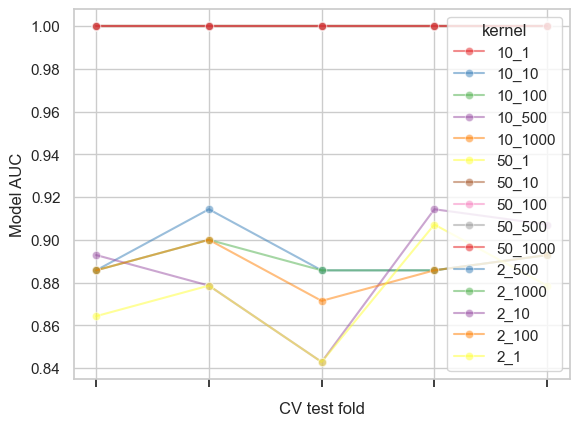

In [49]:
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

_Figure 21: Line plot visualizing the cross-validation (CV) test fold results for multiple models._

Each line represents the area under the receiver operating characteristic curve (AUC) across different folds. The x-axis represents the CV test fold, while the y-axis indicates the model AUC. The use of markers, palette, and transparency enhances readability and distinguishes between multiple lines corresponding to different models. By displaying AUC values across CV folds, the plot offers insights into the consistency and variability of model performance. A consistent upward trend or plateau across folds suggests stable and robust performance, while erratic fluctuations may indicate instability or sensitivity to specific data subsets (Figure 21).

#### Evalutation of Model 4

In [50]:
# Displaying the importance of each feature
optimised_rf_model = RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)
optimised_rf_model.fit(X_train, y_train)
feature_importance = pd.DataFrame(optimised_rf_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

                          importance
OccuPational Hazards        0.282171
Fatigue                     0.211447
Dry Cough                   0.147631
Smoking                     0.140221
chronic Lung Disease        0.059554
Genetic Risk                0.050361
Alcohol use                 0.037524
Weight Loss                 0.027913
Chest Pain                  0.017764
Wheezing                    0.012885
Shortness of Breath         0.012527
Age                         0.000000
Coughing of Blood           0.000000
Clubbing of Finger Nails    0.000000




Random Forest has a tendency to distribute feature importance more evenly compared to some other models, especially when features are highly correlated with the target variable. This behavior stems from the nature of how Random Forest calculates feature importance. In a Random Forest model, feature importance is typically determined by measuring the decrease in impurity (e.g., Gini impurity) when a particular feature is used for splitting nodes in the trees of the forest.

When features are highly correlated with the target variable, they tend to be selected more frequently for splitting nodes across different trees in the forest, leading to a more equitable distribution of importance among correlated features. This can result in a situation where multiple features contribute significantly to the predictive power of the model, rather than one or a few features dominating the importance ranking. As a result, Random Forest models often provide a more nuanced understanding of feature importance, particularly in scenarios where multiple features are informative predictors of the target variable.

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


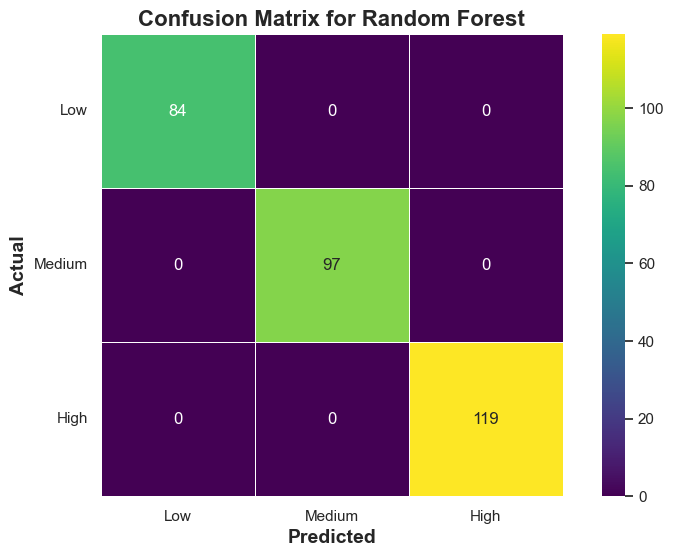

In [51]:
evaluation_metrics(y_test, y_pred_rf, 'Random Forest', average_type='macro')

_Figure 22. The confusion matrix for Random Forest. The heatmap displays the classification results with "Low," "Medium," and "High" labels, while the side labels indicate the counts for each prediction._

Precision, recall, and F1-score are all 1.00, indicating perfect performance for the "High" class. There are 119 instances of this class. Similarly, perfect scores are achieved for precision, recall, and F1-score for the "Low" class. There are 84 instances of this class. Again, perfect scores for precision, recall, and F1-score for the "Medium" class, with 97 instances (Figure 22).

Overall accuracy of the model is also reported as 1.00, indicating perfect accuracy across all classes (Figure 22).

### Model 5. Gradient Boosting Decision Tree (GBDT)

GBDT is an ensemble learning method used for both classification and regression tasks. They work by combining multiple weak learners, typically decision trees, to create a strong predictive model. <br>

*GBDT Algorithm:*
- Decision Trees as Weak Learners: The base learners (weak learners) in a GBDT model are usually decision trees. 
- Gradient Boosting: Fitting the new tree to the residuals (the differences between the actual and predicted values) of the previous tree.
- Gradient Descent Optimization: Iteratively fits a new tree to the negative gradient of the loss function with respect to the predicted values. 
- Shrinkage (Learning Rate): Control the contribution of each tree to the ensemble

*Parameters:*
- n_estimators: Number of trees in the ensemble
- learning_rate: Shrinkage parameter
- max_depth: Maximum depth of the individual trees
- min_samples_split: Minimum number of samples required to split an internal node
- min_samples_leaf: Minimum number of samples required to be at a leaf node
- subsample: Fraction of samples to be used for fitting the individual trees

### Hyperparameter tuning of Gradient Boosting Classifier

To train a Gradient Boosting Classifier with optimal hyperparameters using scikit-learn's GridSearchCV, we start by defining a parameter grid containing various hyperparameter values to search over. These hyperparameters include the number of boosting stages (**n_estimators**), the learning rate (**learning_rate**), the maximum depth of the individual regression estimators (**max_depth**), the minimum number of samples required to split an internal node (**min_samples_split**), the minimum number of samples required to be at a leaf node (**min_samples_leaf**), and the fraction of samples used for fitting the individual base learners (**subsample**).


In [52]:
# Define the parameter grid to search
gbdt_params = {
    'n_estimators': [50, 100], 
    'learning_rate': [0.05, 0.1],  
    'max_depth': [3, 5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'subsample': [0.8, 0.9, 1.0]  
}

# Initialize the GBDT model
gbdt_= GradientBoostingClassifier(random_state=42)

In [53]:
gbdt_model, y_pred_gbdt = gridsearch_method(gbdt_, params=gbdt_params, model_name="Gradient Boosting", cv_=3)

Best Gradient Boosting hyperparameters: GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)
Best Gradient Boosting validation score: 1.0
Gradient Boosting accuracy on test set: 1.0


In [54]:
gbdt_model.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)

After fitting the grid search object to the training data (**'X_train'** and **'y_train'**), we retrieve the best estimator found by accessing the **'best_estimator_'** attribute of the **'grid_search'** object. This **'best_gb_estimator'** instance represents the Gradient Boosting Classifier with the optimal hyperparameters identified through the grid search.

The GBDT model with hyperparameter tuning also predicts "Low", "Medium" and "High" Levels of Lung Cancer in patients with an Accuracy of 1.0. <br>
Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It measures the overall correctness of the model's predictions across all classes.

#### Manual exploration for hyperparameters in Gradient Boosting Classifier
Given the multitude of hyperparameters involved for this model, one of the primary ones is the learning rate, which directly influences the number of trees in the model. This, in turn, impacts how effectively the model fits the data. Hence, we visualise the learning curve of the model.

Note that optimised_gbdt_model is used instead of gbdt_model earlier on as running the same method as gbdt_model takes a lot of computation time

In [55]:
optimised_gbdt_model = GradientBoostingClassifier(learning_rate=0.05, 
                                           max_depth=3, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=50, 
                                           subsample=0.8,
                                           random_state=42)

optimised_gbdt_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)

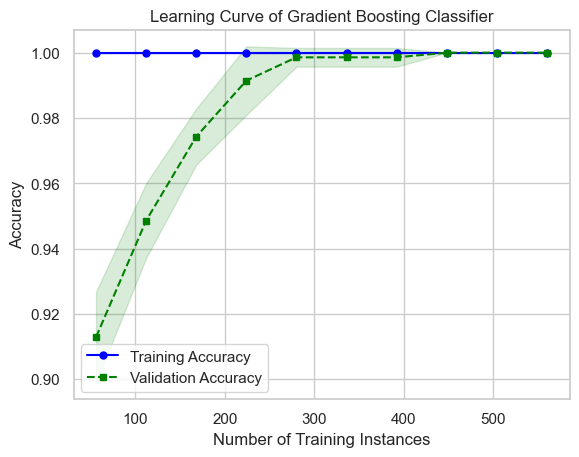

In [56]:
train_sizes, train_scores, test_scores = learning_curve(optimised_gbdt_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy')
plt.title('Learning Curve of Gradient Boosting Classifier')
plt.legend()
plt.show()


_Figure 23. Learning curve of the Gradient Boosting Classifier using cross-validation and plot the training and validation accuracy as a function of the number of training instances._

The training accuracy is consistently high at 1.0, indicating that the model is able to capture the complexities of the training data well. However, we also abserve that the validation accuracy reaches a high value of 1.0 relatively quickly, at around 450 Training Instances, which suggests that the model generalizes well to unseen data (Figure 23).

This situation could indicate that the model is not overfitting, despite achieving high training accuracy. Overfitting occurs when the model learns to capture noise in the training data rather than the underlying patterns, leading to poor generalization to new data. However, if both training and validation accuracies are high and converge quickly, it suggests that the model is not merely memorizing the training data but is instead capturing meaningful patterns that generalize to unseen data.

In [57]:
# Cross-validation
cv_scores = cross_val_score(optimised_gbdt_model, X, y, cv=5, scoring='accuracy')
print(f'CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


The accuracy scores obtained for each fold of the cross-validation process is 1.0, it suggests that the model achieved perfect accuracy on each fold of the cross-validation. A perfect accuracy score of 1.0 means that the model correctly classified all instances in the validation set for that fold.

In [58]:
# Displaying the importance of each feature
feature_importance = pd.DataFrame(optimised_gbdt_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

                          importance
Coughing of Blood           0.283937
Fatigue                     0.159860
Alcohol use                 0.150337
Wheezing                    0.142297
Smoking                     0.106935
Age                         0.038771
Clubbing of Finger Nails    0.036707
OccuPational Hazards        0.033646
Chest Pain                  0.021267
chronic Lung Disease        0.011048
Dry Cough                   0.008059
Weight Loss                 0.002670
Shortness of Breath         0.002525
Genetic Risk                0.001941


GBDT typically assigns higher importance to features that are more effective at reducing the model's loss function during the boosting process. GBDT tends to concentrate importance on a subset of features that are particularly informative or predictive. This concentration occurs because the model sequentially builds a series of weak learners (usually decision trees) where each subsequent learner focuses on minimizing the residual errors made by the previous learners. 

Consequently, features that are more effective at reducing these errors receive higher importance weights, leading to a more concentrated feature importance distribution. As a result, GBC often identifies a smaller set of key features that have the most significant impact on model performance, providing insights into the most influential predictors in the dataset. This concentrated feature importance can be advantageous for interpretability and understanding the underlying mechanisms driving predictions.

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


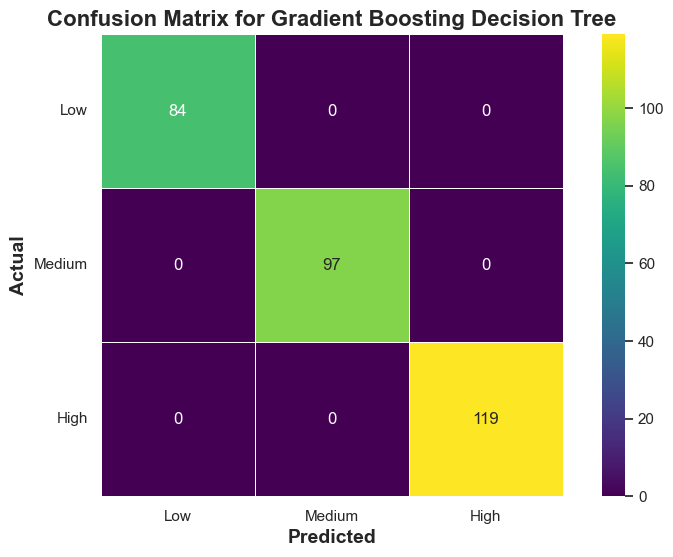

In [59]:
evaluation_metrics(y_test, y_pred_gbdt, 'Gradient Boosting Decision Tree', average_type='macro')

_Figure 24. The confusion matrix for Gradient Boosting Decision Tree. The heatmap displays the classification results with "Low," "Medium," and "High" labels, while the side labels indicate the counts for each prediction._

Similar to the Logistic Regression and Random Forest model, GBDT achieves flawless classification accuracy on the test set, as evident from the absence of misclassifications depicted in the confusion matrix (Figures 18, 22 and 24). Consequently, precision, recall, and F1-score all reach a value of 1. This reaffirms the effectiveness of employing ensemble methods, such as Random Forest, for predicting the risk of lung cancer occurrence in the dataset.

# Section 6: Conclusion

In general, we demonstrated the suitability of machine learning techniques as an alternative, non-invasive diagnostic tool for predicting the risk of lung cancer occurrence. In our preliminary investigation we illustrated the usage of feature selection and engineering to empower our prediction models. Further, we proved that simple models are sufficient to predict class labels in our dataset. However, given the non-parametric and complex nature of biological systems, ensemble methods could be leveraged to better handle the intricate relationships between features. Between RF and GBDT, the feature importance points towards RF being a more suitable model that interprets the biological correlation among features and the target label. Ensemble methods are particularly important as we expand the dataset to include more features and data points for more robust predictions in the future.